In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
park19 = pd.read_csv('data/park2019.csv')
park20 = pd.read_csv('data/2020.csv')
sales19 = pd.read_csv('data/districtsales_2019.csv')
sales20 = pd.read_csv('data/districtsales_2020.csv')

In [3]:
sales20

,Unnamed: 0,1분기 매출액,1분기 점포수,2분기 매출액,2분기 점포수,3분기 매출액,3분기 점포수,4분기 매출액,4분기 점포수,매출액 합계
0,강남구,98906968357,1860,98782500413,1828,94503710803,1846,87512526793,2040,379705706366
1,강동구,10547035569,452,9912085901,452,9473153925,452,7687079096,452,37619354491
2,강북구,9192785870,253,23116097333,544,5543341008,201,5724703758,210,43576927969
3,강서구,7724930619,355,8381801481,317,6149399871,282,4908522512,290,27164654483
4,관악구,18378390590,479,19875085039,492,19617933077,494,14897645534,492,72769054240
5,광진구,13859197396,365,14658315807,361,13926654881,374,12186050828,408,54630218912
6,구로구,9987117335,307,11316909805,308,11235038576,320,9454798342,319,41993864058
7,금천구,9200450669,297,10712742568,304,10759133788,312,9711381510,321,40383708535
8,노원구,4046334109,109,9248728185,236,4031791561,112,7285463771,174,24612317626
9,도봉구,5132394579,193,4227245421,156,3758569483,161,2963499113,164,16081708596


In [4]:
sales20['평균점포수'] = (sales20['1분기 점포수'] + sales20['2분기 점포수'] + sales20['3분기 점포수'] + sales20['4분기 점포수']) / 4

In [5]:
sales19['평균점포수'] = (sales19['1분기 점포수'] + sales19['2분기 점포수'] + sales19['3분기 점포수'] + sales19['4분기 점포수']) / 4

In [6]:
series0 = (sales20['매출액 합계'] - sales19['매출액 합계'])/sales19['매출액 합계']

In [7]:
series0

0    -0.207761
1    -0.024124
2     1.353998
3     0.111985
4     0.131941
5    -0.084862
6    -0.038557
7     0.040453
8    -0.284024
9     0.121985
10    0.002456
11   -0.200021
12   -0.373139
13    0.104756
14    0.012098
15    0.447044
16   -0.019489
17    0.016095
18    0.886890
19    0.236631
20    0.010340
21   -0.041805
22   -0.121128
23   -0.263686
24    0.251153
Name: 매출액 합계, dtype: float64

In [8]:
df = pd.concat([sales20['Unnamed: 0'],series0,park19['공원수'], park19['면적']], axis = 1)

In [9]:
df['면적'] = pd.to_numeric(df['면적'])

In [10]:
df['면적']

0      6594.3
1      3369.8
2     14342.3
3      4370.3
4     10976.9
5      3363.5
6      3336.1
7      2206.2
8     14344.4
9     10075.0
10     1275.1
11     4584.2
12     4440.0
13     5143.3
14    16081.0
15     3100.0
16     8329.4
17     4644.8
18     2912.0
19     3050.4
20     1779.6
21    13991.6
22    11556.1
23     3155.1
24     5205.3
Name: 면적, dtype: float64

In [11]:
stats.pearsonr(df['면적'], df['매출액 합계'])

(0.11445717130753968, 0.5859029823513294)

In [12]:
stats.pearsonr( df['공원수'],df['매출액 합계'])

(-0.22130130674484672, 0.28773221356692286)

Text(0, 0.5, 'Year-over-year')

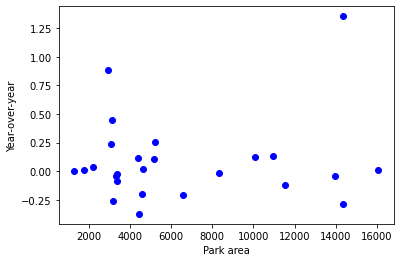

In [13]:
plt.plot(df['면적'], df['매출액 합계'], 'bo')
plt.xlabel('Park area')
plt.ylabel('Year-over-year')

Text(0, 0.5, 'Year-over-year')

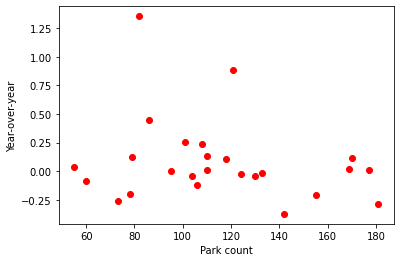

In [14]:
plt.plot( df['공원수'],df['매출액 합계'], 'ro')
plt.xlabel('Park count')
plt.ylabel('Year-over-year')

In [15]:
df = pd.read_csv('data/working.csv')

In [16]:
dobo = pd.read_csv('data/dobo.csv')
stats.pearsonr(dobo['dobo_person'], df['매출액 합계'])

(-0.11863675975218178, 0.5721989530942481)

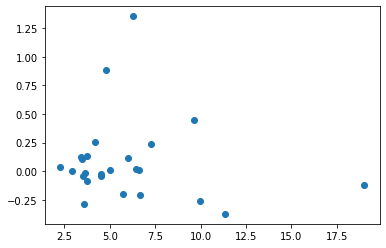

In [17]:
plt.scatter(dobo['dobo_person'], df['매출액 합계'])

In [18]:
df

,Unnamed: 0.1,Unnamed: 0,매출액 합계,공원수,면적,구면적
0,0,강남구,-0.207761,155,6594.3,39.50
1,1,강동구,-0.024124,124,3369.8,24.59
2,2,강북구,1.353998,82,14342.3,23.60
3,3,강서구,0.111985,170,4370.3,41.44
4,4,관악구,0.131941,110,10976.9,29.57
5,5,광진구,-0.084862,60,3363.5,17.06
6,6,구로구,-0.038557,104,3336.1,20.12
7,7,금천구,0.040453,55,2206.2,13.02
8,8,노원구,-0.284024,181,14344.4,35.44
9,9,도봉구,0.121985,79,10075.0,20.65


In [19]:
df['19평균점포수'] = sales19['평균점포수']
df['20평균점포수'] = sales20['평균점포수']

In [20]:
df['면적'] = df['면적'] / 1000

In [21]:
df

,Unnamed: 0.1,Unnamed: 0,매출액 합계,공원수,면적,구면적,19평균점포수,20평균점포수
0,0,강남구,-0.207761,155,6.5943,39.50,1910.25,1893.50
1,1,강동구,-0.024124,124,3.3698,24.59,386.00,452.00
2,2,강북구,1.353998,82,14.3423,23.60,170.00,302.00
3,3,강서구,0.111985,170,4.3703,41.44,265.00,311.00
4,4,관악구,0.131941,110,10.9769,29.57,426.75,489.25
5,5,광진구,-0.084862,60,3.3635,17.06,337.25,377.00
6,6,구로구,-0.038557,104,3.3361,20.12,303.25,313.50
7,7,금천구,0.040453,55,2.2062,13.02,280.00,308.50
8,8,노원구,-0.284024,181,14.3444,35.44,144.25,157.75
9,9,도봉구,0.121985,79,10.0750,20.65,147.00,168.50


In [22]:
stats.pearsonr( df['공원수'],df['매출액 합계'])

(-0.2213013066127989, 0.2877322138619312)

In [23]:
stats.pearsonr(df['면적'], df['매출액 합계'])

(0.1144571715008159, 0.5859029817143452)

In [24]:
df['공원면적비율'] = df['면적'] / df['구면적']

In [25]:
df

,Unnamed: 0.1,Unnamed: 0,매출액 합계,공원수,면적,구면적,19평균점포수,20평균점포수,공원면적비율
0,0,강남구,-0.207761,155,6.5943,39.50,1910.25,1893.50,0.166944
1,1,강동구,-0.024124,124,3.3698,24.59,386.00,452.00,0.137039
2,2,강북구,1.353998,82,14.3423,23.60,170.00,302.00,0.607725
3,3,강서구,0.111985,170,4.3703,41.44,265.00,311.00,0.105461
4,4,관악구,0.131941,110,10.9769,29.57,426.75,489.25,0.371217
5,5,광진구,-0.084862,60,3.3635,17.06,337.25,377.00,0.197157
6,6,구로구,-0.038557,104,3.3361,20.12,303.25,313.50,0.165810
7,7,금천구,0.040453,55,2.2062,13.02,280.00,308.50,0.169447
8,8,노원구,-0.284024,181,14.3444,35.44,144.25,157.75,0.404752
9,9,도봉구,0.121985,79,10.0750,20.65,147.00,168.50,0.487893


In [26]:
stats.pearsonr(df['공원면적비율'], df['매출액 합계'])

(0.23853711674840275, 0.25084643646491867)

Text(0, 0.5, 'Year-over-year')

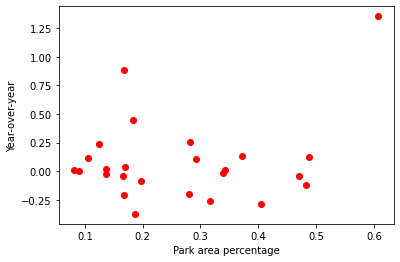

In [27]:
plt.plot(df['공원면적비율'], df['매출액 합계'], 'ro')
plt.xlabel('Park area percentage')
plt.ylabel('Year-over-year')

In [28]:
df = df.drop(2)

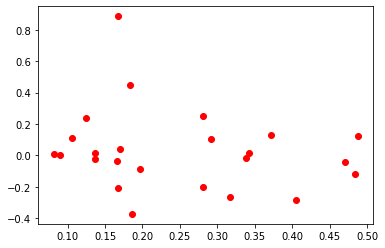

In [29]:
plt.plot(df['공원면적비율'], df['매출액 합계'], 'ro')

In [30]:
stats.pearsonr(df['공원면적비율'], df['매출액 합계'])

(-0.19984288741539058, 0.34914235186837644)

In [31]:
df2 = pd.read_csv('data/working-natural.csv')

In [32]:
df2

,Unnamed: 0.1,Unnamed: 0,매출액합계,자연뺀공원수,자연뺀공원면적,구면적
0,0,강남구,-0.207761,142,5304.7,39.50
1,1,강동구,-0.024124,115,2827.5,24.59
2,2,강북구,1.353998,62,2287.4,23.60
3,3,강서구,0.111985,158,3285.9,41.44
4,4,관악구,0.131941,98,10970.4,29.57
5,5,광진구,-0.084862,44,2916.4,17.06
6,6,구로구,-0.038557,64,3014.4,20.12
7,7,금천구,0.040453,47,2042.2,13.02
8,8,노원구,-0.284024,128,13848.1,35.44
9,9,도봉구,0.121985,50,1163.5,20.65


In [33]:
df2['19평균점포수'] = sales19['평균점포수']
df2['20평균점포수'] = sales20['평균점포수']
df2['자연뺀공원면적'] = df2['자연뺀공원면적'] / 1000
df2['공원면적비율'] = df2['자연뺀공원면적'] / df2['구면적']

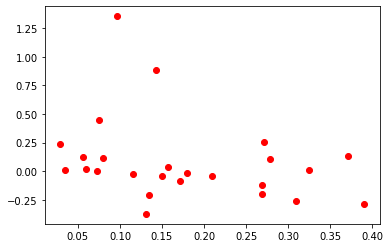

In [34]:
plt.plot(df2['공원면적비율'], df2['매출액합계'], 'ro')

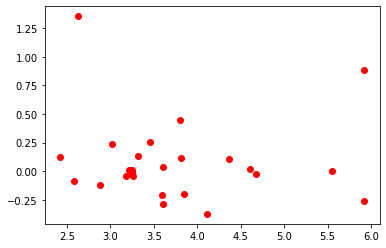

In [35]:
plt.plot(df2['자연뺀공원수']/df2['구면적'], df2['매출액합계'], 'ro')

In [36]:
df2 = df2.drop([2,18])

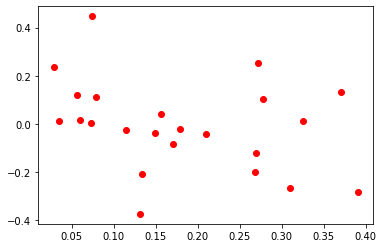

In [37]:
plt.plot(df2['공원면적비율'], df2['매출액합계'], 'ro')

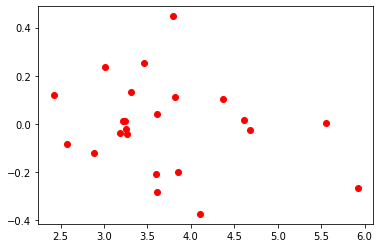

In [38]:
plt.plot(df2['자연뺀공원수']/df2['구면적'], df2['매출액합계'], 'ro')

In [39]:
stats.pearsonr(df2['공원면적비율'], df2['매출액합계'])

(-0.3197566036640249, 0.13692194787389464)

In [40]:
stats.pearsonr(df2['자연뺀공원수']/df2['구면적'], df2['매출액합계'])

(-0.2268991451247926, 0.29780845032690734)

In [41]:
df2['19점포수'] = sales19['평균점포수']
df2['20점포수'] = sales20['평균점포수']
df2

,Unnamed: 0.1,Unnamed: 0,매출액합계,자연뺀공원수,자연뺀공원면적,구면적,19평균점포수,20평균점포수,공원면적비율,19점포수,20점포수
0,0,강남구,-0.207761,142,5.3047,39.50,1910.25,1893.50,0.134296,1910.25,1893.50
1,1,강동구,-0.024124,115,2.8275,24.59,386.00,452.00,0.114986,386.00,452.00
3,3,강서구,0.111985,158,3.2859,41.44,265.00,311.00,0.079293,265.00,311.00
4,4,관악구,0.131941,98,10.9704,29.57,426.75,489.25,0.370998,426.75,489.25
5,5,광진구,-0.084862,44,2.9164,17.06,337.25,377.00,0.170950,337.25,377.00
6,6,구로구,-0.038557,64,3.0144,20.12,303.25,313.50,0.149821,303.25,313.50
7,7,금천구,0.040453,47,2.0422,13.02,280.00,308.50,0.156851,280.00,308.50
8,8,노원구,-0.284024,128,13.8481,35.44,144.25,157.75,0.390748,144.25,157.75
9,9,도봉구,0.121985,50,1.1635,20.65,147.00,168.50,0.056344,147.00,168.50
10,10,동대문구,0.002456,79,1.0330,14.22,322.75,398.50,0.072644,322.75,398.50


In [42]:
df2['점포증가율'] = (df2['20점포수'] - df2['19점포수']) / df2['19점포수']
df2

,Unnamed: 0.1,Unnamed: 0,매출액합계,자연뺀공원수,자연뺀공원면적,구면적,19평균점포수,20평균점포수,공원면적비율,19점포수,20점포수,점포증가율
0,0,강남구,-0.207761,142,5.3047,39.50,1910.25,1893.50,0.134296,1910.25,1893.50,-0.008768
1,1,강동구,-0.024124,115,2.8275,24.59,386.00,452.00,0.114986,386.00,452.00,0.170984
3,3,강서구,0.111985,158,3.2859,41.44,265.00,311.00,0.079293,265.00,311.00,0.173585
4,4,관악구,0.131941,98,10.9704,29.57,426.75,489.25,0.370998,426.75,489.25,0.146456
5,5,광진구,-0.084862,44,2.9164,17.06,337.25,377.00,0.170950,337.25,377.00,0.117865
6,6,구로구,-0.038557,64,3.0144,20.12,303.25,313.50,0.149821,303.25,313.50,0.033800
7,7,금천구,0.040453,47,2.0422,13.02,280.00,308.50,0.156851,280.00,308.50,0.101786
8,8,노원구,-0.284024,128,13.8481,35.44,144.25,157.75,0.390748,144.25,157.75,0.093588
9,9,도봉구,0.121985,50,1.1635,20.65,147.00,168.50,0.056344,147.00,168.50,0.146259
10,10,동대문구,0.002456,79,1.0330,14.22,322.75,398.50,0.072644,322.75,398.50,0.234702


In [43]:
df3 = df2.loc[df2['매출액합계'] * df2['점포증가율'] < 0]    #매출액은 감소했지만 점포는 증가한 구들만 모음
df4 = df2.loc[df2['매출액합계'] * df2['점포증가율'] > 0]    #이외의 구들
print(df3)
print(df4)

    Unnamed: 0.1 Unnamed: 0     매출액합계  자연뺀공원수  자연뺀공원면적    구면적  19평균점포수  \
1              1        강동구 -0.024124     115   2.8275  24.59   386.00   
5              5        광진구 -0.084862      44   2.9164  17.06   337.25   
6              6        구로구 -0.038557      64   3.0144  20.12   303.25   
8              8        노원구 -0.284024     128  13.8481  35.44   144.25   
11            11        동작구 -0.200021      63   4.3902  16.35   386.50   
16            16        성북구 -0.019489      80   4.4070  24.58   309.25   
21            21        은평구 -0.041805      97   6.2234  29.71   297.25   
22            22        종로구 -0.121128      69   6.4330  23.91   981.00   
23            23         중구 -0.263686      59   3.0827   9.96  1068.50   

    20평균점포수    공원면적비율    19점포수    20점포수     점포증가율  
1    452.00  0.114986   386.00   452.00  0.170984  
5    377.00  0.170950   337.25   377.00  0.117865  
6    313.50  0.149821   303.25   313.50  0.033800  
8    157.75  0.390748   144.25   157.75  0.093588  

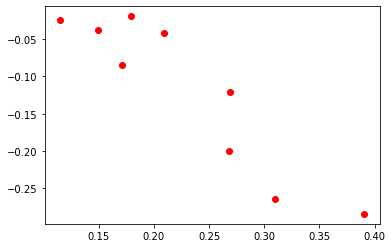

In [44]:
plt.plot(df3['공원면적비율'], df3['매출액합계'], 'ro')

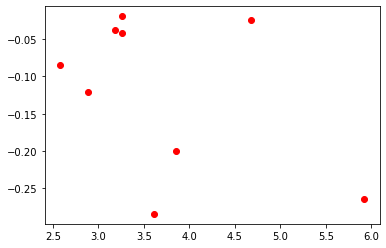

In [45]:
plt.plot(df3['자연뺀공원수']/df3['구면적'], df3['매출액합계'], 'ro')

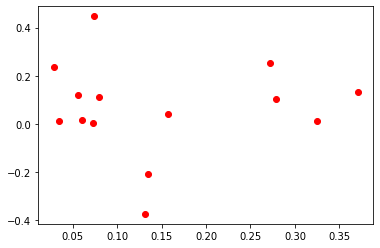

In [46]:
plt.plot(df4['공원면적비율'], df4['매출액합계'], 'ro')

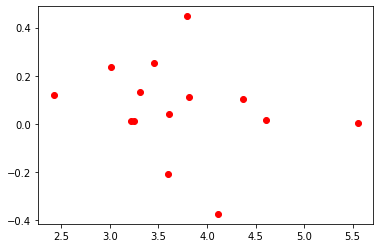

In [47]:
plt.plot(df4['자연뺀공원수']/df4['구면적'], df4['매출액합계'], 'ro')

In [48]:
print(stats.pearsonr(df3['공원면적비율'], df3['매출액합계']))
print(stats.pearsonr(df3['자연뺀공원수']/df3['구면적'], df3['매출액합계']))
print(stats.pearsonr(df4['공원면적비율'], df4['매출액합계']))
print(stats.pearsonr(df4['자연뺀공원수']/df4['구면적'], df4['매출액합계']))

(-0.9196451860962412, 0.00044735579113243964)
(-0.4448292238585333, 0.23024261854416053)
(0.00972504029106909, 0.9736781612493043)
(-0.23012425558574212, 0.42866491907825416)


In [49]:
df5 = df2.loc[df2['매출액합계']< 0]
df6 = df2.loc[df2['매출액합계']> 0]

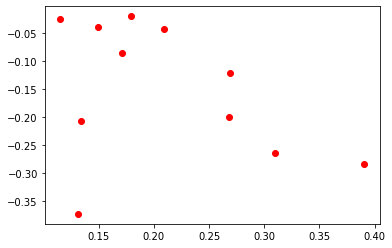

In [50]:
plt.plot(df5['공원면적비율'], df5['매출액합계'], 'ro')

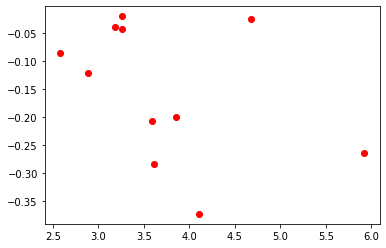

In [51]:
plt.plot(df5['자연뺀공원수']/df5['구면적'], df5['매출액합계'], 'ro')

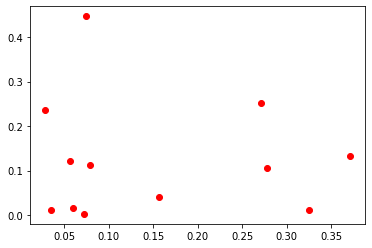

In [52]:
plt.plot(df6['공원면적비율'], df6['매출액합계'], 'ro')

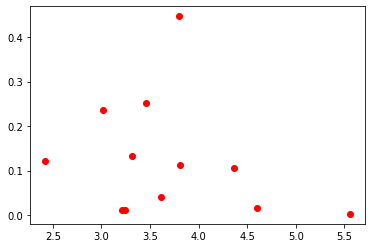

In [53]:
plt.plot(df6['자연뺀공원수']/df6['구면적'], df6['매출액합계'], 'ro')

In [54]:
print(stats.pearsonr(df5['공원면적비율'], df5['매출액합계']))
print(stats.pearsonr(df5['자연뺀공원수']/df5['구면적'], df5['매출액합계']))
print(stats.pearsonr(df6['공원면적비율'], df6['매출액합계']))
print(stats.pearsonr(df6['자연뺀공원수']/df6['구면적'], df6['매출액합계']))

(-0.375518282032271, 0.2550924703422216)
(-0.41409914391844876, 0.20545582211880434)
(-0.056232280406408125, 0.862197654824693)
(-0.25081380404752257, 0.4316903223079733)
